In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
# read in data 
data = pd.read_csv('../data/weatherdata.csv')

# change column names 
data.columns = ['date', 'max_temp', 'min_temp', 'mean_temp', 'sunrise', 'sunset', 'daylight', 'sunshine', 'total_precip', 'rain', 'snow', 'precip_hours', 'max_wind', 'wind_direction_deg']


# from https://stackoverflow.com/questions/60249618/map-dictionary-of-wind-directions-to-new-column
compass = {range(349, 11) : 'N',
    range(11, 34) : 'NNE',
    range(34, 56) : 'NE',
    range(56, 79) : 'ENE',
    range(79, 101) : 'E',
    range(101, 124) : 'ESE',
    range(124, 146) : 'SE',
    range(146, 169) : 'SSE',
    range(169, 191) : 'S',
    range(191, 214) : 'SSW',
    range(214, 236) : 'SW',
    range(236, 259) : 'WSW',
    range(259, 281) : 'W',
    range(281, 304) : 'WNW',
    range(304, 326) : 'NW',
    range(326, 349) : 'NNW'
    }

df_dict = {}

for k,v in compass.items():
    for item in k:
        df_dict[int(item)] = v

wind_df = pd.DataFrame.from_dict(df_dict,orient='index').reset_index()
wind_df.columns=['wind_direction_deg', 'wind_direction']

data = pd.merge(data,wind_df,on=['wind_direction_deg'],how='left')

data['wind_direction'] = data['wind_direction'].replace(np.nan, 'N')
data

,date,max_temp,min_temp,mean_temp,sunrise,sunset,daylight,sunshine,total_precip,rain,snow,precip_hours,max_wind,wind_direction_deg,wind_direction
0,2014-02-11,35.5,25.1,29.4,2014-02-11T12:08,2014-02-11T22:47,38365.12,33949.02,0.000,0.000,0.028,0.0,6.2,52,NE
1,2014-02-12,29.7,21.6,25.1,2014-02-12T12:07,2014-02-12T22:49,38496.72,19440.25,0.028,0.000,0.220,2.0,6.5,73,ENE
2,2014-02-13,34.6,23.9,27.5,2014-02-13T12:05,2014-02-13T22:50,38628.59,0.00,1.331,0.051,8.957,24.0,15.0,0,N
3,2014-02-14,48.4,26.4,36.2,2014-02-14T12:04,2014-02-14T22:51,38760.85,35593.99,0.004,0.000,0.028,1.0,11.9,263,W
4,2014-02-15,38.5,29.2,33.5,2014-02-15T12:03,2014-02-15T22:52,38894.68,23170.67,0.173,0.106,0.469,10.0,15.2,321,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2024-02-21,50.3,25.2,36.1,2024-02-21T11:56,2024-02-21T22:58,39672.02,36553.46,0.000,0.000,0.000,0.0,6.9,100,E
3663,2024-02-22,59.7,29.7,41.4,2024-02-22T11:55,2024-02-22T22:59,39810.41,24310.46,0.000,0.000,0.000,0.0,9.6,173,S
3664,2024-02-23,56.7,46.8,51.4,2024-02-23T11:54,2024-02-23T23:00,39950.05,7714.95,0.091,0.091,0.000,9.0,12.5,204,SSW
3665,2024-02-24,51.5,36.9,43.4,2024-02-24T11:52,2024-02-24T23:01,40091.00,21030.43,0.142,0.142,0.000,5.0,8.8,303,WNW


In [3]:
compass = {range(0, 45) : 'N',
    range(45, 135) : 'E',
    range(135, 225) : 'S',
    range(225, 315) : 'W',
    range(315, 360) : 'N',
    }

df_dict = {}

for k,v in compass.items():
    for item in k:
        df_dict[int(item)] = v

wind_df = pd.DataFrame.from_dict(df_dict,orient='index').reset_index()
wind_df.columns=['wind_direction_deg', 'wind_direction_general']

data = pd.merge(data,wind_df,on=['wind_direction_deg'],how='left')

data['wind_direction_general'] = data['wind_direction_general'].replace(np.nan, 'N')
data

,date,max_temp,min_temp,mean_temp,sunrise,sunset,daylight,sunshine,total_precip,rain,snow,precip_hours,max_wind,wind_direction_deg,wind_direction,wind_direction_general
0,2014-02-11,35.5,25.1,29.4,2014-02-11T12:08,2014-02-11T22:47,38365.12,33949.02,0.000,0.000,0.028,0.0,6.2,52,NE,E
1,2014-02-12,29.7,21.6,25.1,2014-02-12T12:07,2014-02-12T22:49,38496.72,19440.25,0.028,0.000,0.220,2.0,6.5,73,ENE,E
2,2014-02-13,34.6,23.9,27.5,2014-02-13T12:05,2014-02-13T22:50,38628.59,0.00,1.331,0.051,8.957,24.0,15.0,0,N,N
3,2014-02-14,48.4,26.4,36.2,2014-02-14T12:04,2014-02-14T22:51,38760.85,35593.99,0.004,0.000,0.028,1.0,11.9,263,W,W
4,2014-02-15,38.5,29.2,33.5,2014-02-15T12:03,2014-02-15T22:52,38894.68,23170.67,0.173,0.106,0.469,10.0,15.2,321,NW,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2024-02-21,50.3,25.2,36.1,2024-02-21T11:56,2024-02-21T22:58,39672.02,36553.46,0.000,0.000,0.000,0.0,6.9,100,E,E
3663,2024-02-22,59.7,29.7,41.4,2024-02-22T11:55,2024-02-22T22:59,39810.41,24310.46,0.000,0.000,0.000,0.0,9.6,173,S,S
3664,2024-02-23,56.7,46.8,51.4,2024-02-23T11:54,2024-02-23T23:00,39950.05,7714.95,0.091,0.091,0.000,9.0,12.5,204,SSW,S
3665,2024-02-24,51.5,36.9,43.4,2024-02-24T11:52,2024-02-24T23:01,40091.00,21030.43,0.142,0.142,0.000,5.0,8.8,303,WNW,W


In [4]:
# export data
data.to_csv('../data/data.csv')

# EDA

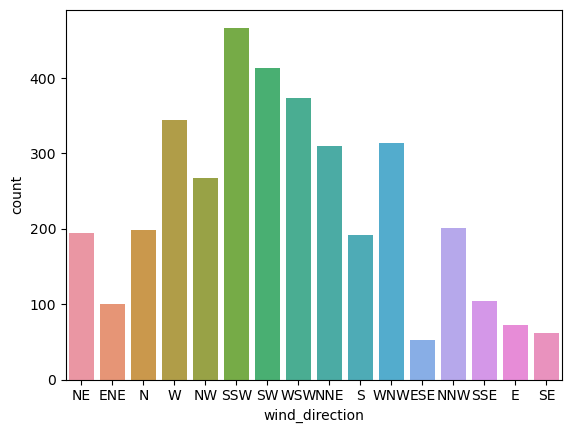

In [18]:
fig = sns.countplot(data = data, x ='wind_direction')
plt.savefig('../OUTPUT/wind_direction_specific.png')

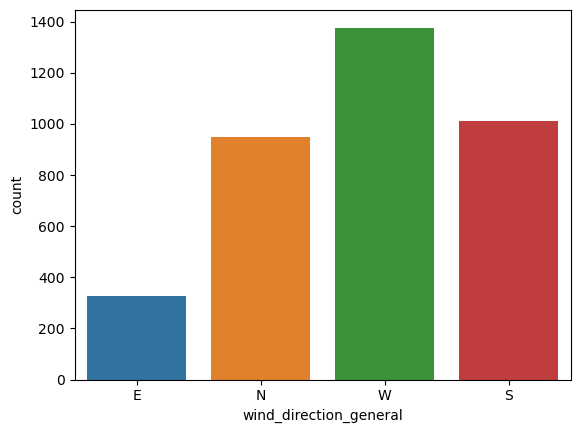

In [19]:
fig = sns.countplot(data = data, x ='wind_direction_general')
plt.savefig('../OUTPUT/wind_direction_general.png')

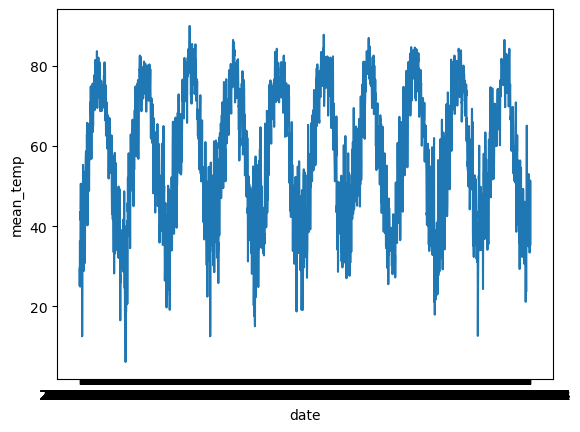

In [23]:
fig = sns.lineplot(data=data, x='date', y='mean_temp')
plt.savefig('../OUTPUT/temperature_over_time.png')

In [26]:
fig = sns.lineplot(data=data, x='date', y='total_precip')
plt.savefig('../OUTPUT/precip_over_time.png')

Error in callback <function flush_figures at 0x7f959a3d6670> (for post_execute):


KeyboardInterrupt: 

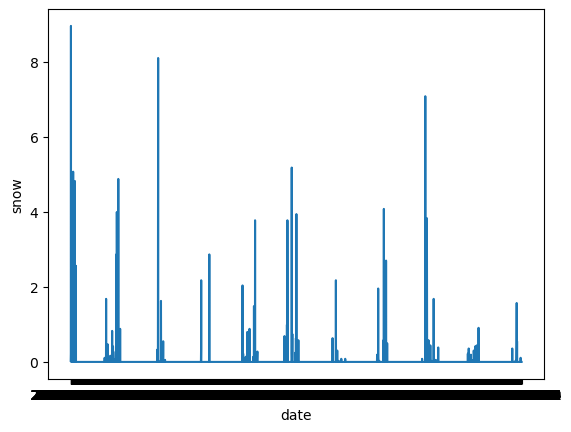

In [27]:
fig = sns.lineplot(data=data, x='date', y='snow')
plt.savefig('../OUTPUT/snow_over_time.png')